In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

### Inspect and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Create Features

In [6]:
name = df.name

In [7]:
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [8]:
df = df.drop(columns=["name",
                      "ticket",
                      "home.dest",
                      "boat",
                      "body",
                      "cabin"])


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df['sex_male'] = df['sex_male'].astype('int64')
df['embarked_Q'] = df['embarked_Q'].astype('int64')
df['embarked_S'] = df['embarked_S'].astype('int64')

In [11]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

### Split Data

In [12]:
y = df.survived
X = df.drop(["survived"], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.isnull().sum()

pclass          0
age           187
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

### Impute Data

In [16]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [17]:
# Fix null values in X dataframe for Chapter 8
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X[cols_to_impute] = imp_mode.fit_transform(X[cols_to_impute])

In [18]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

In [19]:
X_train.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [20]:
X_test.isnull().sum()

pclass         0
age           76
sibsp          0
parch          0
fare           0
sex_male       0
embarked_Q     0
embarked_S     0
dtype: int64

In [21]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])

In [22]:
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

### Normalize Data

In [23]:
# To be used for data scaling (normalizing)
from sklearn.preprocessing import StandardScaler

In [24]:
# easier way of building out a list when you have a lot of values/columns to add 
cols = "pclass,age,sibsp,parch,fare".split(",")
#cols = X_train.columns
cols

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [25]:
sca = StandardScaler()
sca.fit(X_train[cols])
X_train[cols] = sca.transform(X_train[cols])

sca.fit(X_test[cols])
X_test[cols] = sca.transform(X_test[cols])

In [26]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.070918,-0.498616,-0.432553,-0.474092,1,0,1
677,0.825248,-0.232596,-0.498616,-0.432553,-0.488616,1,0,1
534,-0.363317,-0.798468,-0.498616,-0.432553,-0.145647,0,0,1
1174,0.825248,-0.070918,6.897852,1.805972,0.679370,0,0,1
864,0.825248,-0.070918,-0.498616,-0.432553,-0.490904,0,0,1


### Chapter 11 begins here

In [27]:
pd.set_option('display.float_format', '{:.10f}'.format)

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### Validation Curve

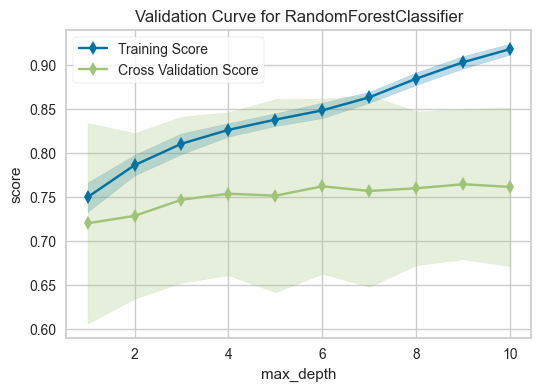

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [31]:
from yellowbrick.model_selection import ValidationCurve

fig, ax = plt.subplots(figsize=(6,4))
vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100),
    param_name="max_depth",
    param_range=np.arange(1,11),
    cv=10,
    n_jobs=-1)
vc_viz.fit(X, y)
vc_viz.poof()

### Learning Curve

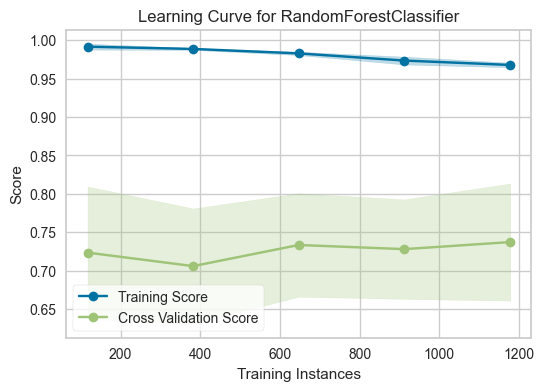

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
from yellowbrick.model_selection import LearningCurve

fig, ax = plt.subplots(figsize=(6,4))
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100),
    cv=10
)

lc_viz.fit(X,y)
lc_viz.poof()
